In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [140]:
import pandas as pd
Kayaking= pd.read_excel("V02Max_Combined.xlsx",sheet_name= "Kayaking")
Triathlon= pd.read_excel("V02Max_Combined.xlsx",sheet_name= "Triathlon")
Fencing= pd.read_excel("V02Max_Combined.xlsx",sheet_name= "Fencing")
Athletes=pd.read_excel("V02Max_Combined.xlsx",sheet_name= "Athletes")
#Kayaking.head()

C:\ProgramData\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
C:\ProgramData\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
C:\ProgramData\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


Q1:Join all sport-related tables to produce one dataframe that has all athletes values. The final table should only have the same 5 columns: ID, time,power,RR, vo2, power. Write this dataframe to an excel file.


In [191]:

AllAthletesData=pd.merge(Kayaking,Triathlon,how='outer').merge(Fencing,how='outer')
AllAthletesData.head()
AllAthletesData.to_excel('AllAthletesData.xlsx',sheet_name='AllAthletesData',index=False)

Q2:Divide the rows into 3 parts: Warm up, GET(graded exercise test) and cool down using the data def. Label each row accordingly


In [192]:
df_excersizetype=pd.read_excel('AllAthletesData.xlsx',sheet_name='AllAthletesData')
df_excersizetype.loc[df_excersizetype['time'] < 0,'ExType']='Warm Up' 
df_excersizetype.loc[(df_excersizetype['time'] >= 0) & (df_excersizetype['power'] > 0), 'ExType'] = 'GET'
df_excersizetype.loc[(df_excersizetype['time'] >= 0) & (df_excersizetype['power'] == 0), 'ExType'] = 'Cool Down'
df_excersizetype

,ID,time,RR,VO2,power,HR,ExType
0,11,-168.600,727.0,0.287147,0,83.0,Warm Up
1,11,-167.872,728.0,0.287147,0,82.0,Warm Up
2,11,-167.148,724.0,0.287147,0,83.0,Warm Up
3,11,-166.484,664.0,0.320580,0,90.0,Warm Up
4,11,-165.836,648.0,0.320580,0,93.0,Warm Up
...,...,...,...,...,...,...,...
52057,10,942.700,428.0,0.786363,0,NaN,Cool Down
52058,10,943.124,424.0,0.786363,0,NaN,Cool Down
52059,10,943.552,428.0,0.786363,0,NaN,Cool Down
52060,10,943.976,424.0,0.786363,0,NaN,Cool Down


Q15:Assign 1 of the following 5 heart rate zones for every record for all sports and athletes and add this as a column to every table:
Zone 1 (recovery/easy)       <100 HR max
Zone 2 (aerobic/base)        100-120 HR max
Zone 3 (tempo)        120-135 HR max
Zone 4 (lactate threshold)        135-155 HR max
Zone 5 (anaerobic)        155+ HR max and above

In [193]:
df_excersizetype['HR']=60/(df_excersizetype['RR']/1000)
df_excersizetype
df_excersizetype.loc[df_excersizetype['HR'] < 100,'Zone Type']='Zone 1'
df_excersizetype.loc[(df_excersizetype['HR'].between(100,120)), 'Zone Type'] = 'Zone 2'
df_excersizetype.loc[(df_excersizetype['HR'].between(121,135)), 'Zone Type'] = 'Zone 3'
df_excersizetype.loc[(df_excersizetype['HR'].between(136,155)), 'Zone Type'] = 'Zone 4'
df_excersizetype.loc[df_excersizetype['HR'] > 155, 'Zone Type'] = 'Zone 5'
df_excersizetype

,ID,time,RR,VO2,power,HR,ExType,Zone Type
0,11,-168.600,727.0,0.287147,0,82.530949,Warm Up,Zone 1
1,11,-167.872,728.0,0.287147,0,82.417582,Warm Up,Zone 1
2,11,-167.148,724.0,0.287147,0,82.872928,Warm Up,Zone 1
3,11,-166.484,664.0,0.320580,0,90.361446,Warm Up,Zone 1
4,11,-165.836,648.0,0.320580,0,92.592593,Warm Up,Zone 1
...,...,...,...,...,...,...,...,...
52057,10,942.700,428.0,0.786363,0,140.186916,Cool Down,Zone 4
52058,10,943.124,424.0,0.786363,0,141.509434,Cool Down,Zone 4
52059,10,943.552,428.0,0.786363,0,140.186916,Cool Down,Zone 4
52060,10,943.976,424.0,0.786363,0,141.509434,Cool Down,Zone 4


Q17:What is the maximum ventilatory threshold for triathletes.


Q18:Display the number of athletes in every sport against the name of the sport.

In [133]:
#calculate the number of Athletes in each sport
sport_counts= Athletes['sport'].value_counts()
print('Number of athletes in every sport:')
for sport, count in sport_counts.items():
    print(sport, ':', count)
    

Number of athletes in every sport:
fencing : 10
kayak : 6
triathlon : 2


Q19:Display a bar chart showing the average V02 Max by sport.

In [ ]:
#Selected 

Q20:Analyze the trend of HR at the start of the test vs the middle and the end.What is the overall trend? 

Q21:Display a pie chart of number of athletes by sport.

C:\ProgramData\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


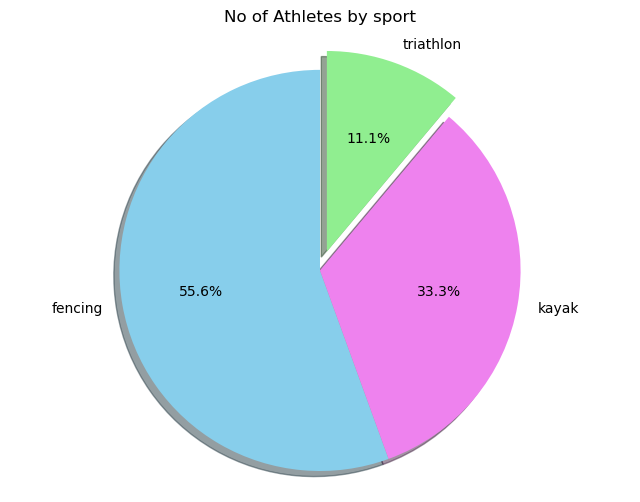

In [38]:
Athletes=pd.read_excel("V02Max_Combined.xlsx",sheet_name= "Athletes")
#display(Athletes)
#counting no. of persons in each sport
Sport_cnt=Athletes['sport'].value_counts()
fig, ax=plt.subplots(figsize=(8,6))
explode=(0, 0, 0.1)
colors=['skyblue', 'violet', 'lightgreen']
ax.pie(Sport_cnt.values, labels=Sport_cnt.index, autopct='%1.1f%%', startangle=90, shadow=True, colors=colors, explode=explode)
ax.set_title(label='No of Athletes by sport')
ax.axis('equal')
plt.show()


Q22:Using any 10 HR values print even if the value is an even number and odd if its an odd number

In [190]:
# Load the Excel file Kayank
Kayaking= pd.read_excel("V02Max_Combined.xlsx",sheet_name= "Kayaking")
#creating HR column,
Kayaking['HR']= 60/(Kayaking['RR']/1000)
#roundoff HR to integer value
Kayaking['HR']=Kayaking['HR'].round()
#display (Kayaking)
value_10_HR=Kayaking['HR'].head(10)
#display (value_10_HR)
print('First 10 HR values from Kayank, and checking value is even or odd')
for i, hr in enumerate(value_10_HR, 1):
    if hr == -1:
        print(f"{i}. Invalid HR value")
    elif hr % 2.0 == 0:
        print(f"{i}. {hr} - HR value is even")
    else:
        print(f"{i}. {hr} - HR value is odd")


First 10 HR values from Kayank, and checking value is even or odd
1. 83.0 - HR value is odd
2. 82.0 - HR value is even
3. 83.0 - HR value is odd
4. 90.0 - HR value is even
5. 93.0 - HR value is odd
6. 97.0 - HR value is odd
7. 86.0 - HR value is even
8. 75.0 - HR value is odd
9. 76.0 - HR value is even
10. 78.0 - HR value is even


Q23:Which heart rate zone did most participants spend the longest duration of time in?

Q24:Store athlete name and sport in a dictionary as a pair of values.

In [124]:
#creating an empty dictionary
athlete_name_sport_dict={}
#iterating through rows, and adding key-value pairs in dict
for athlete_index, row in Athletes.iterrows():
    athlete_fullname= f"{row['First Name']}{row['Last Name']}"
    athlete_name_sport_dict[athlete_fullname]=row['sport']
print('Athlete name and sport dictionary is')
print(athlete_name_sport_dict)


Athlete name and sport dictionary is
{'OliviaMartinez': 'fencing', 'EthanReynolds': 'fencing', 'JacksonHarper': 'fencing', 'LiamSanchez': 'fencing', 'AvaThompson': 'fencing', 'SophiaRodriguez': 'fencing', 'GraceSimmons': 'fencing', 'AidenBennett': 'fencing', 'ChloePrice': 'fencing', 'LilyJordan': 'fencing', 'IsabellaGriffin': 'kayak', 'CalebDixon': 'kayak', 'MiaCarpenter': 'kayak', 'HarperMitchell': 'kayak', 'MasonWallace': 'kayak', 'LoganAnderson': 'kayak', 'LucasFoster': 'triathlon', 'OwenMyers': 'triathlon'}


Q25:Using arrays and loops, find the count of athletes based on gender.

In [119]:
#first created an array
athlete_gender_array=np.array(Athletes['Gender'])
male_athlete_count=0
female_athlete_count=0
#using loop
for gender in athlete_gender_array:
    if gender == 'Male':
        male_athlete_count = male_athlete_count+1
    elif gender == 'Female':
        female_athlete_count = female_athlete_count+1
print('Number of Male athletes is', male_athlete_count)
print('Number of Female athletes is', female_athlete_count)

Number of Male athletes is 8
Number of Female athletes is 10


Q26:Create a sankey diagram to show the groups of race within each sport

Q27:Calculate the average heart rate for every minute for every athlete and add it as a column in the same dataframe.

Q28:Print athlete 15s Age and Pvt1 using the format() function

In [138]:
#Selecting Athlete with ID 15,
Athlete_15=Athletes[Athletes['ID'] == 15].iloc[0]
age=Athlete_15['age']
Pvt1=Athlete_15['P_vt1']
print('The Age and Pvt1 of Athlete with ID 15 is age: {}, Pvt1 : {}'. format(age,Pvt1) )

The Age and Pvt1 of Athlete with ID 15 is age: 13, Pvt1 : 125


Q29:On average how long was each participants’ warm up?

Q30:Display the HRV of each athlete?

Q31:Return the count of athletes for any sport that the user inputs.

In [114]:
#Athletes=pd.read_excel("V02Max_Combined.xlsx",sheet_name= "Athletes")
user_input=input('Enter the sport name:')
#converting the user input into lower case, in case if it is case sensitive
user_input=user_input.lower()
#checking if sport exists in dataframe, that too case-sensitive
if user_input in Athletes['sport'].str.lower().unique():
    count=Athletes[Athletes['sport'].str.lower() == user_input].shape[0]
    print('The count of athletes is', count)
else:
    print('The given input is not a valid sport in given dataset')
   

Enter the sport name:FENCING
The count of athletes is 10


Q32:Insert the name of every athlete into an array and display the length of that array.

In [86]:
Athletes['full name'] = Athletes['First Name'] + ' ' + Athletes['Last Name']
# Creating a NumPy array of athlete names
Athlete_name = np.array(Athletes['full name'])
# Displaying array
print("Array of athlete names:", Athlete_name)
print('The length of array (total number of athletes) is:', len(Athlete_name))

Array of athlete names: ['Olivia Martinez' 'Ethan Reynolds' 'Jackson Harper' 'Liam Sanchez'
 'Ava Thompson' 'Sophia Rodriguez' 'Grace Simmons' 'Aiden Bennett'
 'Chloe Price' 'Lily Jordan' 'Isabella Griffin' 'Caleb Dixon'
 'Mia Carpenter' 'Harper Mitchell' 'Mason Wallace' 'Logan Anderson'
 'Lucas Foster' 'Owen Myers']
The length of array (total number of athletes) is: 18


In [ ]:
EQ1:Draw a nested piechart for number of athletes by sport and nested with gender.

In [ ]:
Q79:Plot the Donut chart athlete distrubution by Gender